<a href="https://colab.research.google.com/github/gpava/Analisis_Numerico/blob/main/Integraci%C3%B3nNum%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regla del Trapecio


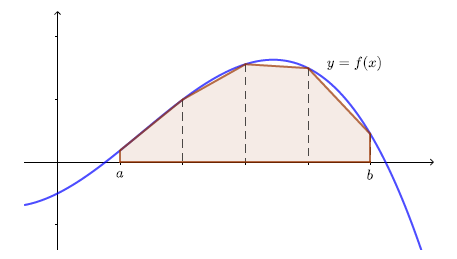

$\textbf{Teorema (Regla del trapecio)}$. Sea $f(x)$ una función acotada sobre el intervalo $[a, b]$. Podemos aproximar

$$\int_a^b f(x) d x$$

por medio de
$$
T_n=\frac{\Delta x}{2}\left(y_0+2 y_1+2 y_2+\cdots+2 y_{n-1}+y_n\right) \text
{, }
$$
donde $P=\left\{a=x_0, x_1, \ldots, x_n=b\right\}$ es una partición del intervalo $[a, b]$ en $n$ subintervalos iguales, cada uno de longitud
$$\Delta x=\frac{b-a}{n}$$ y donde $y_k=f\left(x_k\right)$. Para $k=0,1,2,3,4,\cdots ,n$.

La aproximación por trapecio tambien se puede escribir como:

$$T_n = \frac{\Delta x}{2}\left(f(x_0)+f(x_n)+2\sum_{k=1}^{n-1}f(x_k)\right)=\frac{\Delta x}{2}\left(f(x_0)+f(x_n)\right)+\Delta x \sum_{k=1}^{n-1}f(x_k)$$

con $x_k=a+kΔx$

In [1]:
import math
from scipy.integrate import quad

In [2]:
def f(x):
    return x**2 # Define la función que quieres integrar aquí

In [3]:
def trapecio(a, b, n):
    delta_x = (b - a) / n
    sum_area = (f(a) + f(b)) / 2
    for i in range(1, n):
        sum_area = sum_area + f((a + b) / 2)
    return delta_x * sum_area

# Definir los extremos del intervalo o límites de integración y el número de subintervalos
# Ojo con las funciones y los limites de integracion para no tener divisiones por cero
a = 0
b = 1
n = 4

Taprox = trapecio(a, b, n)
print("Aproximación de la integral por regla del trapecio:", Taprox)

Aproximación de la integral por regla del trapecio: 0.3125


##¿Cuál es el valor real?

Por ejemplo para la función $f(x)=x^2$ es muy sencillo y sabemos que el valor real es $\frac{1}{3}$

In [4]:
I = quad(f, 0, 1)
valorexacto=I[0]
I

(0.33333333333333337, 3.700743415417189e-15)

In [5]:
valorexacto

0.33333333333333337

In [6]:
error_relativo = abs(valorexacto - Taprox) / abs(valorexacto)
error_abso= abs(valorexacto - Taprox)
print("error absoluto: ", error_abso)
print("Valor real de la integral:", valorexacto)
print("Error relativo trapecio:", round(error_relativo,7))

error absoluto:  0.02083333333333337
Valor real de la integral: 0.33333333333333337
Error relativo trapecio: 0.0625


##Regla de Simpson

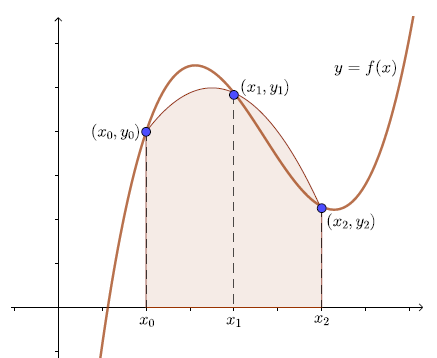

$\textbf{Teorema (Regla de Simpson)}$. Sea $f(x)$ una función acotada sobre el intervalo $[a, b]$. Podemos aproximar

$$\int_a^b f(x) d x$$

por medio de
$$
S=\frac{\Delta x}{3}\left(y_0+ 4y_1+2 y_2+ 4y_3 +2y_4 +\cdots+2y_{n-2}+4 y_{n-1}+y_n\right) \text
{, }
$$
donde $n$ es par, $P=\left\{a=x_0, x_1, \ldots, x_n=b\right\}$ es una partición del intervalo $[a, b]$ en $n$ subintervalos iguales, cada uno de longitud
$$\Delta x=\frac{b-a}{n}$$ y donde $y_k=f\left(x_k\right)$. Para $k=0,1,2,3,4,\cdots ,n$.

Ahora si vemos la fórmula anterior se tiene que los puntos $y_{2k-1}$ son los impares dentro de cada par de subintervalos por ejemplos los puntos $y_3,y_5,\cdots$ y los puntos $y_{2k}$ son los puntos pares por ejemplo $y_2,y_4,⋯$ dentro de cada par de subintervalos.

La aproximación por simpson tambien se puede escribir como:

$$S = \frac{\Delta x}{3}\left(f(x_0)+f(x_n)+4\sum_{k=1}^{n/2}f(x_{2k-1})+2\sum_{k=1}^{\frac{n}{2}-1}f(x_{2k})\right)$$

con $x_k=a+kΔx$

En la fórmula de la regla de Simpson, la suma se divide en dos partes: una suma que involucra los puntos impares y otra suma que involucra los puntos pares. La suma que involucra los puntos impares tiene un factor de 4 en la fórmula, mientras que la suma que involucra los puntos pares tiene un factor de 2.

In [7]:
for i in range(1, 10, 2):
  print(i)

1
3
5
7
9


In [8]:
def simpson(a, b, n):
  delta_x = (b - a) / n #Tamaño de paso delta
  suma_par = 0 #Variable que me almacena la suma de los puntos pares
  suma_impar = 0 #Variable que me almacena la suma de los puntos impares
  for i in range(1, n, 2):
    suma_impar = suma_impar + f(a + i * delta_x)
  for i in range(2, n-1, 2):
    suma_par = suma_par + f(a + i * delta_x)
  aprox = (delta_x / 3) * (f(a) + 2 * suma_par + 4* suma_impar + f(b))
  return aprox

# Definir los extremos del intervalo y el número de subintervalos
a = 0
b = 1
n = 4

S = simpson(a, b, n)
print("Aproximación de la integral:", S)

Aproximación de la integral: 0.3333333333333333


In [9]:
error_relativo = abs(valorexacto - S) / abs(valorexacto)
error_abs= abs(valorexacto - S)
print("valor absoluto: ", error_abs)
print("Valor real de la integral:", valorexacto)
print("Error relativo Simpson:", round(error_relativo,7))

valor absoluto:  5.551115123125783e-17
Valor real de la integral: 0.33333333333333337
Error relativo Simpson: 0.0
